<a href="https://colab.research.google.com/github/axgervais/AI-Python/blob/main/Projet_r%C3%A9gression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Étape 1 : Téléchargement et Chargement des Données
Si tu as déjà téléchargé le dataset (insurance-data.csv), tu peux le charger directement dans ton environnement Jupyter. Sinon, tu peux télécharger le dataset depuis Kaggle.

In [ ]:
import pandas as pd


In [ ]:
# Chemin vers le fichier CSV (assure-toi que le fichier est dans le même répertoire ou spécifie le chemin complet)
file_path = '/content/insurance.csv'

# Charger le dataset
data = pd.read_csv(file_path)

# Afficher les premières lignes du dataset pour vérifier la structure
data.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Étape 2.1 : Analyse des Statistiques Descriptives
Pour cette partie, nous allons obtenir des statistiques descriptives et explorer la distribution de certaines caractéristiques.

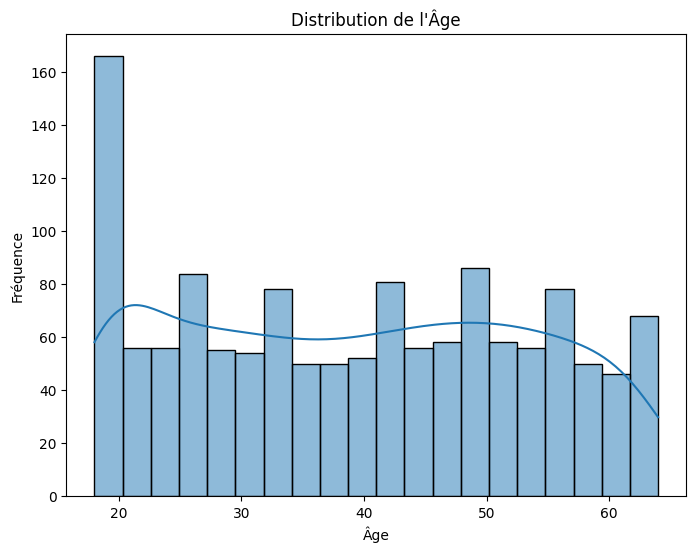

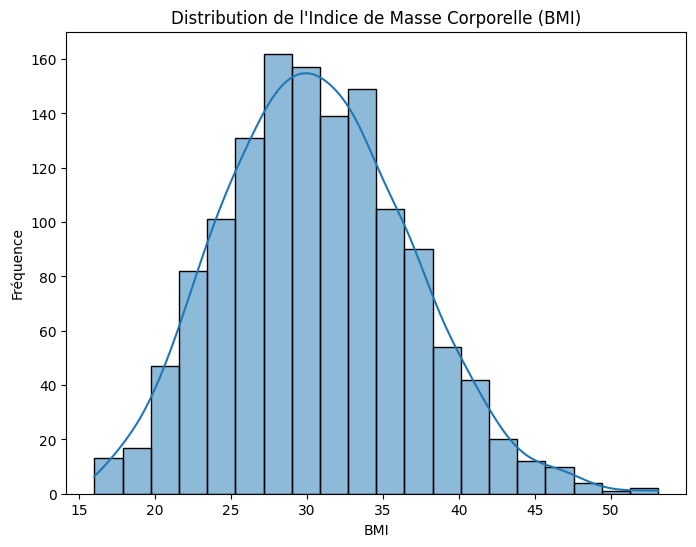

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Afficher les statistiques descriptives
data.describe()

# Distribution de l'âge
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title("Distribution de l'Âge")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

# Distribution de l'indice de masse corporelle (BMI)
plt.figure(figsize=(8, 6))
sns.histplot(data['bmi'], bins=20, kde=True)
plt.title("Distribution de l'Indice de Masse Corporelle (BMI)")
plt.xlabel("BMI")
plt.ylabel("Fréquence")
plt.show()


Étape 2.2 : Visualisation de la Cible et des Caractéristiques
Nous allons examiner si les frais médicaux (charges) varient en fonction du statut de fumeur et de l'âge des clients.

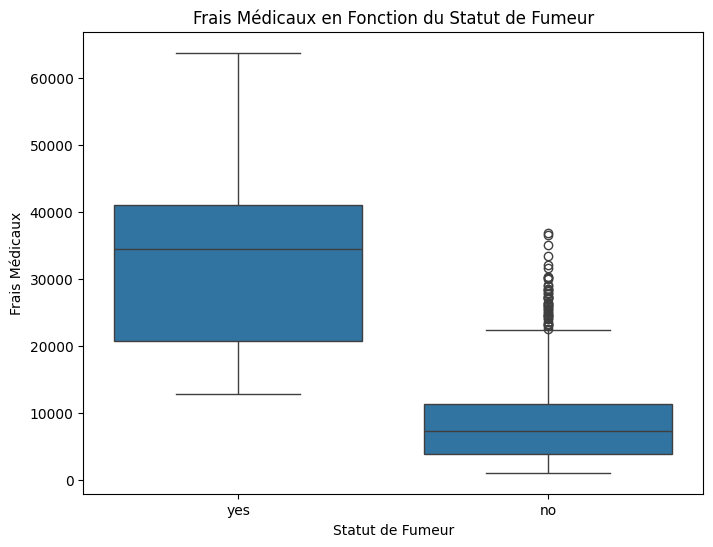

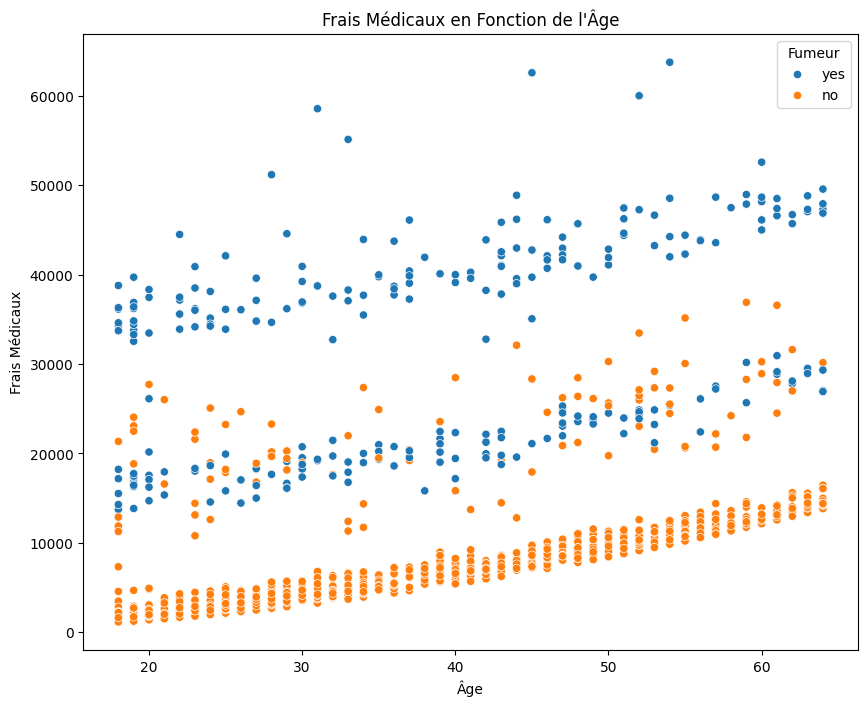

In [ ]:
# Frais médicaux en fonction du statut de fumeur
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='expenses', data=data)
plt.title("Frais Médicaux en Fonction du Statut de Fumeur")
plt.xlabel("Statut de Fumeur")
plt.ylabel("Frais Médicaux")
plt.show()

# Frais médicaux en fonction de l'âge
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='expenses', hue='smoker', data=data)
plt.title("Frais Médicaux en Fonction de l'Âge")
plt.xlabel("Âge")
plt.ylabel("Frais Médicaux")
plt.legend(title="Fumeur")
plt.show()


Étape 2.3 : Analyse des Relations entre Caractéristiques
Cette étape utilise une heatmap de corrélation et des scatter plots pour examiner les relations entre les variables continues.

In [ ]:
# Encodage des variables catégorielles
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


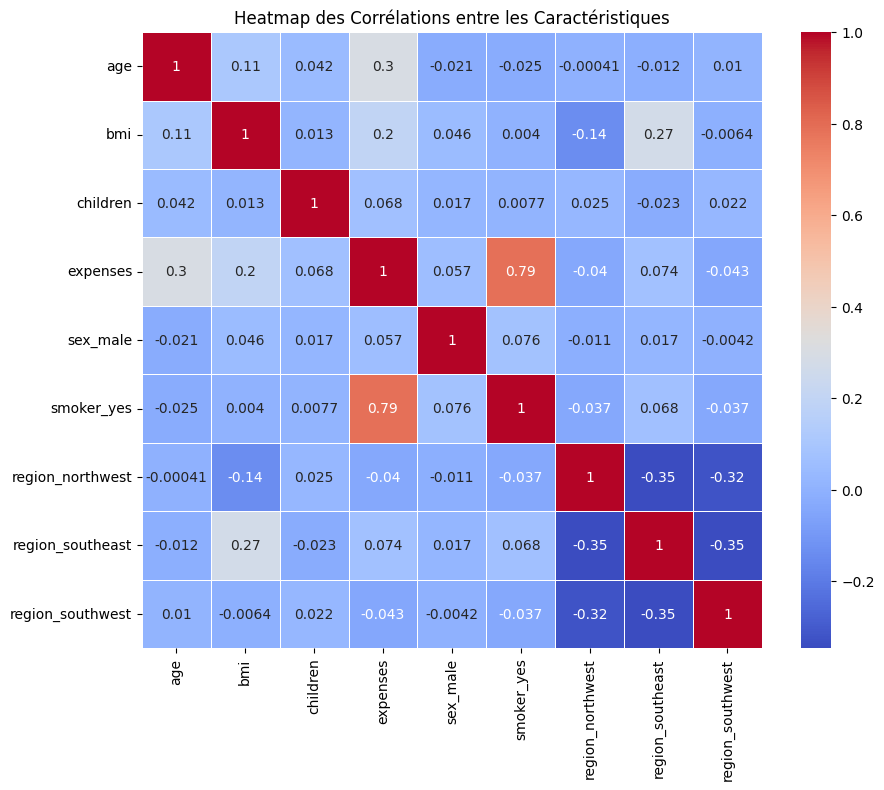

In [ ]:
# Heatmap de corrélation avec les variables encodées
plt.figure(figsize=(10, 8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap des Corrélations entre les Caractéristiques")
plt.show()


Étape 3.1 : TNous allons vérifier les valeurs manquantes et les traiter séparément pour les colonnes numériques et catégorielles

In [ ]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

# Remplir les valeurs manquantes pour les colonnes numériques
data.fillna(data.select_dtypes(include='number').mean(), inplace=True)

# Remplissage des valeurs manquantes pour les colonnes catégorielles avec la méthode "mode" (la valeur la plus fréquente)
for col in data.select_dtypes(include='object').columns:
    data[col].fillna(data[col].mode()[0], inplace=True)



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


<ipython-input-9-80b4f7ec7e34>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


Étape 3.2 : Encodage des Variables Catégorielles (Rappel)
Nous allons effectuer l’encodage one-hot pour sex, smoker, et region :

In [ ]:
# Encodage des variables catégorielles
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)


Étape 4.1 : Séparation de la Cible et des Caractéristiques
Nous allons créer deux ensembles de données :

X qui contient toutes les caractéristiques,
y qui contient la cible (expenses).

In [ ]:
# Définir les caractéristiques (X) et la cible (y)
X = data_encoded.drop('expenses', axis=1)
y = data_encoded['expenses']


Étape 4.2 : Division des Données en Ensembles d’Entraînement et de Test

In [ ]:
from sklearn.model_selection import train_test_split

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles pour confirmation
print("Dimensions de X_train :", X_train.shape)
print("Dimensions de X_test :", X_test.shape)
print("Dimensions de y_train :", y_train.shape)
print("Dimensions de y_test :", y_test.shape)


Dimensions de X_train : (1070, 8)
Dimensions de X_test : (268, 8)
Dimensions de y_train : (1070,)
Dimensions de y_test : (268,)


Étape 4.3 : Standardisation des Variables Continues


In [ ]:
from sklearn.preprocessing import StandardScaler

# Appliquer la standardisation uniquement sur les variables continues
scaler = StandardScaler()

# Standardisation sur les données d'entraînement
X_train[['age', 'bmi', 'children']] = scaler.fit_transform(X_train[['age', 'bmi', 'children']])

# Utiliser les paramètres de standardisation de l'entraînement pour le test
X_test[['age', 'bmi', 'children']] = scaler.transform(X_test[['age', 'bmi', 'children']])


Étape 5.1 : Importer les Modèles de Régression
Nous allons utiliser les modèles suivants :

Régression Linéaire,
Arbre de Décision,
Forêt Aléatoire,
K-Nearest Neighbors (KNN),
SVM pour la Régression.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


In [ ]:
# Créer les modèles
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

# Entraîner chaque modèle et stocker les performances
trained_models = {}
for name, model in models.items():
    # Entraînement du modèle
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} entraîné avec succès.")


Linear Regression entraîné avec succès.
Decision Tree entraîné avec succès.
Random Forest entraîné avec succès.
K-Nearest Neighbors entraîné avec succès.
Support Vector Regressor entraîné avec succès.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Évaluer les modèles et afficher les résultats
for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n{name} :")
    print(f" - Mean Squared Error (MSE) : {mse}")
    print(f" - Mean Absolute Error (MAE) : {mae}")
    print(f" - R² Score : {r2}")



Linear Regression :
 - Mean Squared Error (MSE) : 33600065.35507784
 - Mean Absolute Error (MAE) : 4181.561524000794
 - R² Score : 0.7835726930039905

Decision Tree :
 - Mean Squared Error (MSE) : 42316664.419873506
 - Mean Absolute Error (MAE) : 3145.8914552238803
 - R² Score : 0.7274266694227429

Random Forest :
 - Mean Squared Error (MSE) : 20902239.06838268
 - Mean Absolute Error (MAE) : 2556.0849396108747
 - R² Score : 0.8653629014125361

K-Nearest Neighbors :
 - Mean Squared Error (MSE) : 46767335.90990476
 - Mean Absolute Error (MAE) : 3886.1295746268656
 - R² Score : 0.698758664324181

Support Vector Regressor :
 - Mean Squared Error (MSE) : 166348184.9590521
 - Mean Absolute Error (MAE) : 8606.598293578672
 - R² Score : -0.07149463293888703


Étape 6: Prédictions sur l’Ensemble de Test


                      Model           MSE          MAE  R² Score
0         Linear Regression  3.360007e+07  4181.561524  0.783573
1             Decision Tree  4.231666e+07  3145.891455  0.727427
2             Random Forest  2.090224e+07  2556.084940  0.865363
3       K-Nearest Neighbors  4.676734e+07  3886.129575  0.698759
4  Support Vector Regressor  1.663482e+08  8606.598294 -0.071495


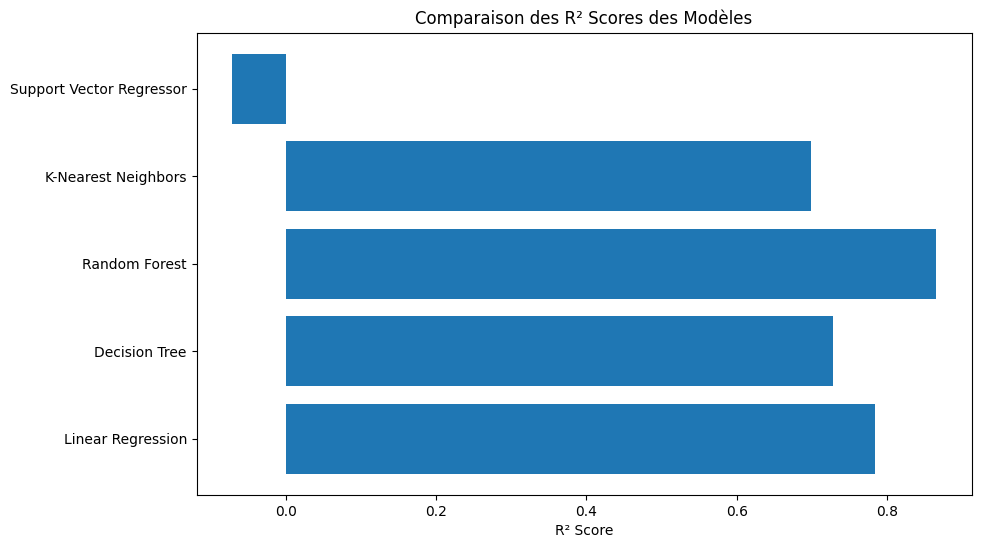

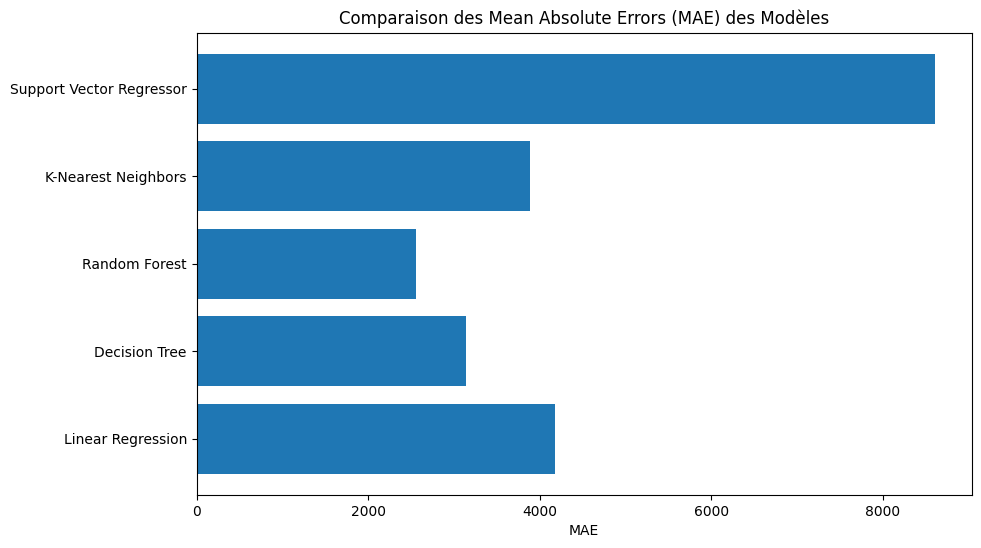

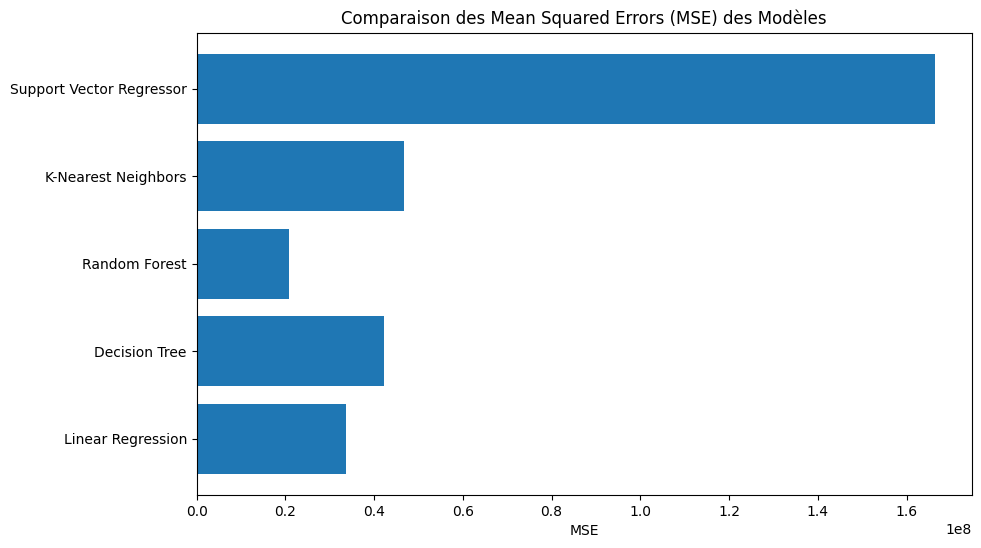

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Stocker les résultats
results = {
    "Model": [],
    "MSE": [],
    "MAE": [],
    "R² Score": []
}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)
    results["Model"].append(name)
    results["MSE"].append(mean_squared_error(y_test, y_pred))
    results["MAE"].append(mean_absolute_error(y_test, y_pred))
    results["R² Score"].append(r2_score(y_test, y_pred))

# Convertir les résultats en DataFrame pour un affichage plus simple
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

# Visualiser les scores R²
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['R² Score'])
plt.xlabel("R² Score")
plt.title("Comparaison des R² Scores des Modèles")
plt.show()

# Visualiser les erreurs MAE
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['MAE'])
plt.xlabel("MAE")
plt.title("Comparaison des Mean Absolute Errors (MAE) des Modèles")
plt.show()

# Visualiser les erreurs MSE
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['MSE'])
plt.xlabel("MSE")
plt.title("Comparaison des Mean Squared Errors (MSE) des Modèles")
plt.show()


Étape 7.1 : Analyse des Coefficients (pour la Régression Linéaire)

In [ ]:
# Extraire les coefficients de la Régression Linéaire
linear_model = trained_models["Linear Regression"]
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": linear_model.coef_
})
coefficients = coefficients.sort_values(by="Coefficient", key=abs, ascending=False)
print("Coefficients de la Régression Linéaire :")
print(coefficients)


Coefficients de la Régression Linéaire :
            Feature   Coefficient
4        smoker_yes  23650.312302
0               age   3614.697633
1               bmi   2037.268555
7  region_southwest   -809.229878
6  region_southeast   -658.712382
2          children    517.330947
5  region_northwest   -370.313511
3          sex_male    -18.519741


Étape 7.2 : Importance des Caractéristiques (pour les Modèles d’Arbres)

In [ ]:
# Importance des caractéristiques pour la Forêt Aléatoire
random_forest_model = trained_models["Random Forest"]
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": random_forest_model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
print("Importance des Caractéristiques (Random Forest) :")
print(importances)


Importance des Caractéristiques (Random Forest) :
            Feature  Importance
4        smoker_yes    0.608618
1               bmi    0.215477
0               age    0.134849
2          children    0.019668
3          sex_male    0.006347
6  region_southeast    0.005536
5  region_northwest    0.005381
7  region_southwest    0.004125


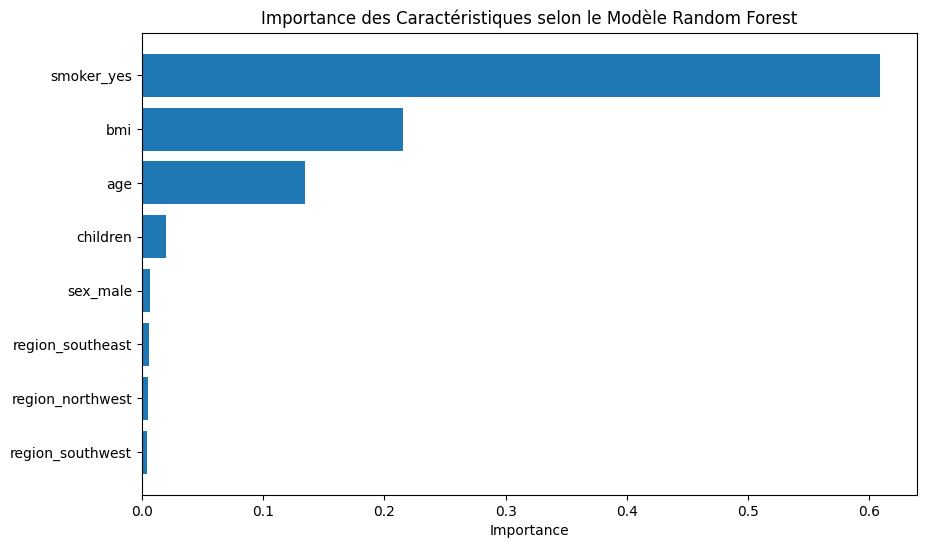

In [ ]:
# Graphique de l'importance des caractéristiques
plt.figure(figsize=(10, 6))
plt.barh(importances["Feature"], importances["Importance"])
plt.xlabel("Importance")
plt.title("Importance des Caractéristiques selon le Modèle Random Forest")
plt.gca().invert_yaxis()
plt.show()


Étape 7.3 : Questions d'Interprétation
À ce stade, voici quelques questions d’interprétation importantes :

Quelles caractéristiques influencent le plus les frais médicaux ?

Les variables comme bmi, smoker et age devraient avoir des impacts significatifs, surtout pour les fumeurs ou les personnes avec un BMI élevé.

Quels insights business peut-on tirer ?

Par exemple, les frais médicaux sont-ils particulièrement élevés pour les fumeurs ou les personnes dans certaines tranches d’âge ?

Le modèle est-il capable de capturer les variations importantes de coûts entre les clients ?

Cela peut être évalué en regardant les erreurs de prédiction sur les clients à coûts élevés.

Étape 7.4 : Section "Challenges et Perspectives"

Challenges rencontrés :
Difficultés dans la standardisation, traitement des variables catégorielles, etc.

Améliorations possibles :
Utiliser d’autres modèles ou des techniques avancées de sélection de caractéristiques, affiner les hyperparamètres, etc.

Prochaines étapes :
 Envisager de collecter davantage de données pour certains groupes de clients (comme les fumeurs) pour améliorer la précision.